In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from matplotlib.image import imread

In [4]:
data_dir = '../data'

In [5]:
os.listdir(data_dir)

['seg_pred', 'seg_test', 'seg_train']

In [6]:
test_path = data_dir+'\\seg_test\\\\seg_test\\'
train_path = data_dir+'\\seg_train\\\\seg_train\\'

In [7]:
test_path

'../data\\seg_test\\\\seg_test\\'

In [8]:
train_path

'../data\\seg_train\\\\seg_train\\'

In [9]:
os.listdir(test_path)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [10]:
os.listdir(train_path)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [11]:
os.listdir(train_path+'buildings')

['0.jpg',
 '10006.jpg',
 '1001.jpg',
 '10014.jpg',
 '10018.jpg',
 '10029.jpg',
 '10032.jpg',
 '10056.jpg',
 '1009.jpg',
 '10113.jpg',
 '1012.jpg',
 '10126.jpg',
 '10144.jpg',
 '10151.jpg',
 '10161.jpg',
 '10165.jpg',
 '10176.jpg',
 '10184.jpg',
 '10185.jpg',
 '10191.jpg',
 '10196.jpg',
 '10198.jpg',
 '10205.jpg',
 '10210.jpg',
 '10228.jpg',
 '10231.jpg',
 '10251.jpg',
 '10252.jpg',
 '10257.jpg',
 '10266.jpg',
 '10278.jpg',
 '1028.jpg',
 '10295.jpg',
 '10303.jpg',
 '10306.jpg',
 '10310.jpg',
 '10312.jpg',
 '10316.jpg',
 '10318.jpg',
 '10328.jpg',
 '10350.jpg',
 '10357.jpg',
 '10362.jpg',
 '10367.jpg',
 '10374.jpg',
 '10383.jpg',
 '10402.jpg',
 '1041.jpg',
 '10421.jpg',
 '10444.jpg',
 '1045.jpg',
 '10452.jpg',
 '10466.jpg',
 '10480.jpg',
 '10485.jpg',
 '10489.jpg',
 '10495.jpg',
 '10499.jpg',
 '10500.jpg',
 '10502.jpg',
 '10511.jpg',
 '10520.jpg',
 '10528.jpg',
 '1055.jpg',
 '10553.jpg',
 '10559.jpg',
 '10570.jpg',
 '10576.jpg',
 '1058.jpg',
 '10582.jpg',
 '10598.jpg',
 '10608.jpg',
 '10

In [12]:
os.listdir(train_path+'buildings')[0]

'0.jpg'

In [13]:
building_img = train_path+'buildings\\'+'0.jpg'

In [14]:
imread(building_img).shape

(150, 150, 3)

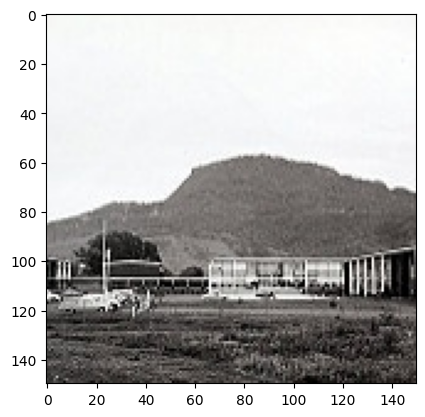

In [15]:
plt.imshow(imread(building_img))

In [16]:
os.listdir(train_path+'forest')[0]

'10007.jpg'

In [17]:
forest_img = train_path+'forest\\'+'10007.jpg'

In [18]:
imread(forest_img).shape

(150, 150, 3)

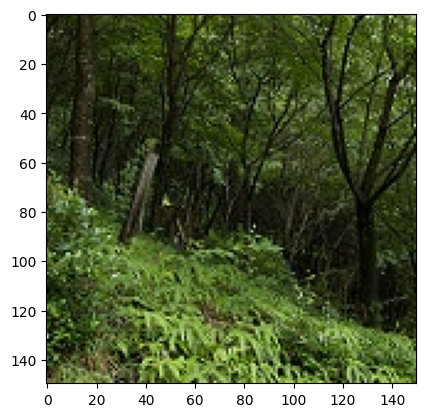

In [19]:
plt.imshow(imread(forest_img))

In [20]:
len(os.listdir(train_path+'buildings'))

2191

In [21]:
len(os.listdir(test_path+'buildings'))

437

In [22]:
len(os.listdir(train_path+'forest'))

2271

In [23]:
len(os.listdir(test_path+'forest'))

474

In [24]:
len(os.listdir(train_path+'glacier'))

2404

In [25]:
len(os.listdir(test_path+'glacier'))

553

In [26]:
len(os.listdir(train_path+'mountain'))

2512

In [27]:
len(os.listdir(test_path+'mountain'))

525

In [28]:
len(os.listdir(train_path+'sea'))

2274

In [29]:
len(os.listdir(test_path+'sea'))

510

In [30]:
len(os.listdir(train_path+'street'))

2382

In [31]:
len(os.listdir(test_path+'street'))

501

In [32]:
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [33]:
dim1 = []
dim2 = []

for category in categories:
    category_path = os.path.join(test_path, category)
    for image_filename in os.listdir(category_path):
        image_path = os.path.join(category_path, image_filename)
        
        try:
            img = imread(image_path)
            
            if len(img.shape) >= 2:
                d1, d2 = img.shape[:2] 
                dim1.append(d1)
                dim2.append(d2)
            else:
                print(f"Skipped image (invalid shape): {image_filename}")
        except Exception as e:
            print(f"Error reading {image_path}: {e}")

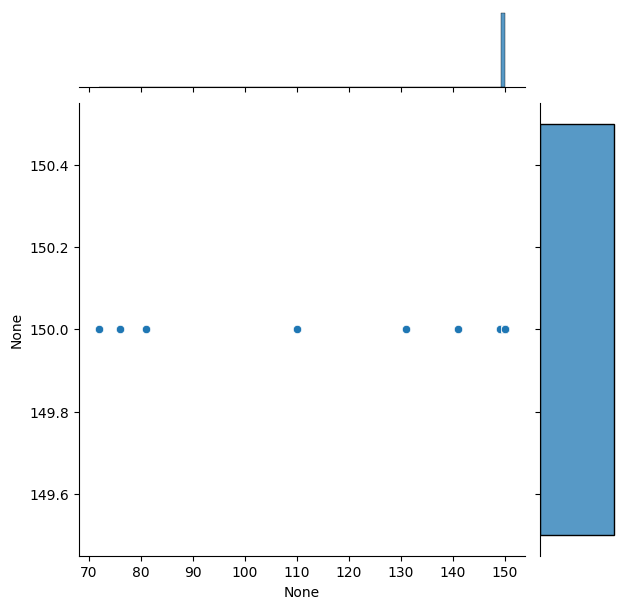

In [34]:
sns.jointplot(x=dim1, y=dim2)

In [35]:
np.mean(dim1)

np.float64(149.90333333333334)

In [36]:
np.mean(dim2)

np.float64(150.0)

In [37]:
image_shape = (150,150,3)

In [38]:
150*150*3

67500

In [39]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 3

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [41]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 11230 images belonging to 6 classes.


In [43]:
val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 2804 images belonging to 6 classes.


In [44]:
test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 3000 images belonging to 6 classes.


In [45]:
from tensorflow.keras.models import Sequential

In [46]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [47]:
model = Sequential()

model.add(Input(shape=image_shape))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [48]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [53]:
model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    callbacks=[early_stop]
)

Epoch 1/10
3744/3744 ━━━━━━━━━━━━━━━━━━━━ 194s 52ms/step - accuracy: 0.5349 - loss: 1.1735 - val_accuracy: 0.6380 - val_loss: 0.9222
Epoch 2/10
3744/3744 ━━━━━━━━━━━━━━━━━━━━ 198s 53ms/step - accuracy: 0.6257 - loss: 0.9588 - val_accuracy: 0.6683 - val_loss: 0.8532
Epoch 3/10
3744/3744 ━━━━━━━━━━━━━━━━━━━━ 196s 52ms/step - accuracy: 0.6773 - loss: 0.8596 - val_accuracy: 0.7101 - val_loss: 0.7699
Epoch 4/10
3744/3744 ━━━━━━━━━━━━━━━━━━━━ 196s 52ms/step - accuracy: 0.7104 - loss: 0.7926 - val_accuracy: 0.6537 - val_loss: 0.8990
Epoch 5/10
3744/3744 ━━━━━━━━━━━━━━━━━━━━ 196s 52ms/step - accuracy: 0.7350 - loss: 0.7511 - val_accuracy: 0.7746 - val_loss: 0.6200
Epoch 6/10
3744/3744 ━━━━━━━━━━━━━━━━━━━━ 197s 53ms/step - accuracy: 0.7456 - loss: 0.7147 - val_accuracy: 0.7714 - val_loss: 0.6317
Epoch 7/10
3744/3744 ━━━━━━━━━━━━━━━━━━━━ 198s 53ms/step - accuracy: 0.7579 - loss: 0.6804 - val_accuracy: 0.7685 - val_loss: 0.6068
Epoch 8/10
3744/3744 ━━━━━━━━━━━━━━━━━━━━ 198s 53ms/step - accuracy: 

In [54]:
losses = pd.DataFrame(model.history.history)

<Axes: >

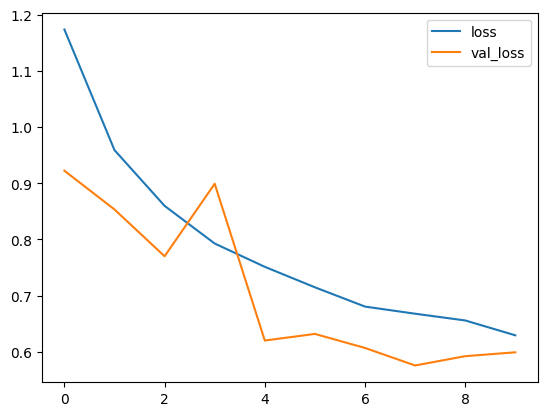

In [55]:
losses[['loss', 'val_loss']].plot()

<Axes: >

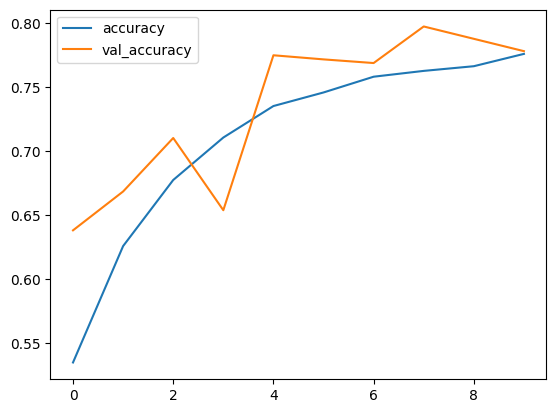

In [56]:
losses[['accuracy', 'val_accuracy']].plot()

In [57]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8063 - loss: 0.5512
Test Accuracy: 80.63%


In [58]:
class_labels = list(train_data.class_indices.keys())

In [59]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0) 
    
    pred = model.predict(img_array)
    predicted_index = np.argmax(pred)
    predicted_label = class_labels[predicted_index]

    print("Predicted class index:", predicted_index)
    print("Predicted label:", predicted_label)

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted class index: 0
Predicted label: buildings


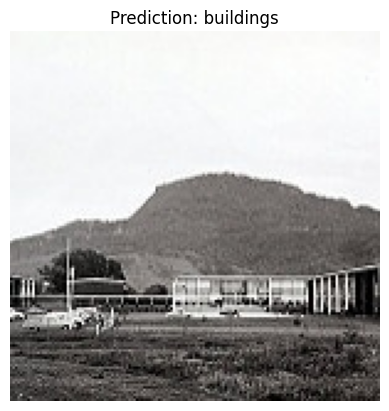

In [60]:
train_path = os.path.join(data_dir, 'seg_train', 'seg_train') + '\\'
building_img = train_path + 'buildings\\0.jpg'

predict_image(building_img)

In [61]:
model.save('../models/intel_model.keras')